<a href="https://colab.research.google.com/github/AniketSaha17/Hailstorm-ML-Analysis/blob/main/Hailstorm_Kolkata_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload Dataset
from google.colab import files
uploaded = files.upload()


Saving Hailstorm_Kolkata_Daily_weather_data.csv to Hailstorm_Kolkata_Daily_weather_data.csv


In [ ]:
#Load the Dataset
import pandas as pd

# Load the uploaded file
df = pd.read_csv("Hailstorm_Kolkata_Daily_weather_data.csv")

# Show the first 5 rows
df.head()


,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,...,pressure_msl_max,pressure_msl_mean,pressure_msl_min,wind_gusts_10m_min,wind_speed_10m_min,winddirection_10m_dominant,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,relative_humidity_2m_mean
0,2000-03-01 18:30:00+00:00,2,25.364418,31.291500,19.641500,0.0,0.0,0,7.008615,18.466480,...,1010.2,1007.73750,1005.3,5.831520,1.415137,174.685530,20.868730,22.653131,19.123100,69.56102
1,2000-03-02 18:30:00+00:00,51,25.735247,32.141502,20.241499,0.1,0.1,1,5.650526,12.246193,...,1011.2,1008.62500,1006.1,4.470832,0.700862,111.317955,21.728630,23.702135,19.465180,72.83331
2,2000-03-03 18:30:00+00:00,51,25.793585,31.441500,21.241499,0.2,0.2,1,6.611914,13.023727,...,1012.1,1009.43756,1007.4,5.637137,2.173279,175.299880,22.502924,24.189722,21.144266,77.71796
3,2000-03-04 18:30:00+00:00,2,26.091500,32.341503,21.691500,0.0,0.0,0,8.166441,16.522640,...,1011.1,1008.28760,1005.8,5.248368,2.029428,184.581130,22.687439,23.674759,21.558298,77.45556
4,2000-03-05 18:30:00+00:00,2,26.381083,31.741499,21.541500,0.0,0.0,0,6.054055,13.606880,...,1010.4,1008.25836,1006.0,4.859600,1.415137,223.625200,22.307383,23.753622,21.139960,72.65309


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
cape_mean,8795
cape_max,8795
cape_min,8795
precipitation_probability_min,8795
precipitation_probability_mean,8795


In [ ]:
# Check data types
df.dtypes

# Describe the key numerical columns
df[['temperature_2m_mean', 'precipitation_sum', 'relative_humidity_2m_mean']].describe()


,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean
count,8795.000000,8795.000000,8795.000000
mean,25.947127,4.494963,76.575818
std,4.053481,9.368273,10.180564
min,14.451919,0.000000,33.213985
25%,23.101376,0.000000,69.494295
50%,27.222748,0.200000,77.080574
75%,28.697753,5.599999,85.352650
max,34.910250,155.400010,97.103750


In [ ]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['temperature_2m_mean', 'precipitation_sum', 'relative_humidity_2m_mean'])


<Axes: xlabel='temperature_2m_mean', ylabel='Count'>

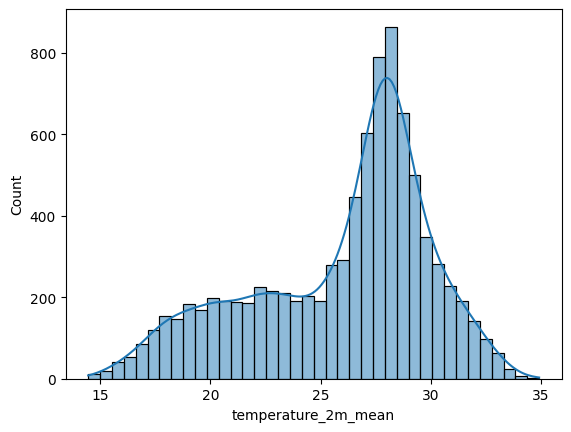

In [ ]:
#Check for Outliers
import seaborn as sns

sns.histplot(df['temperature_2m_mean'], kde=True)


In [ ]:
# Ensure date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a 'year' column
df['year'] = df['date'].dt.year


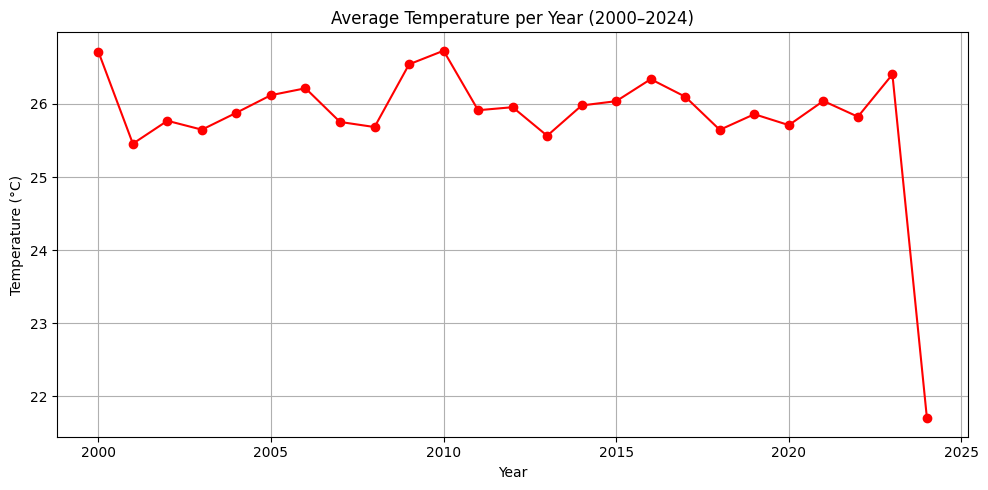

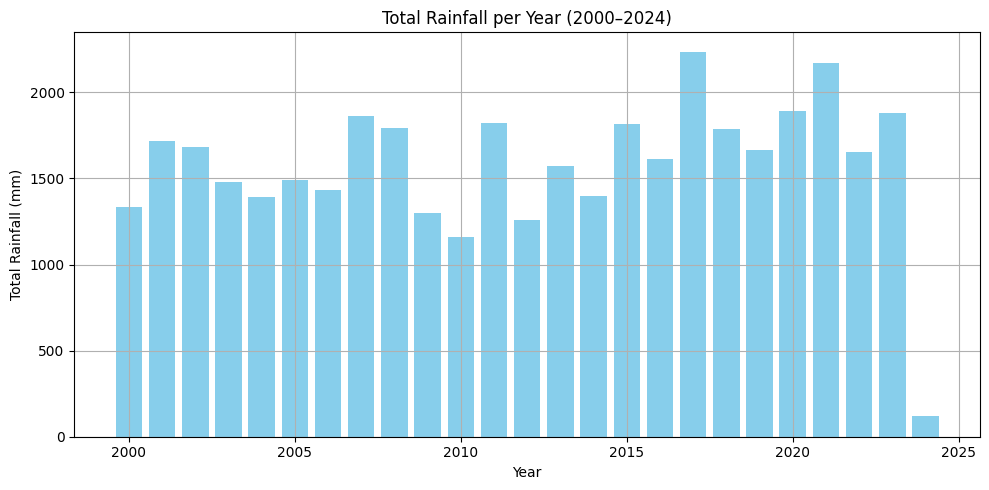

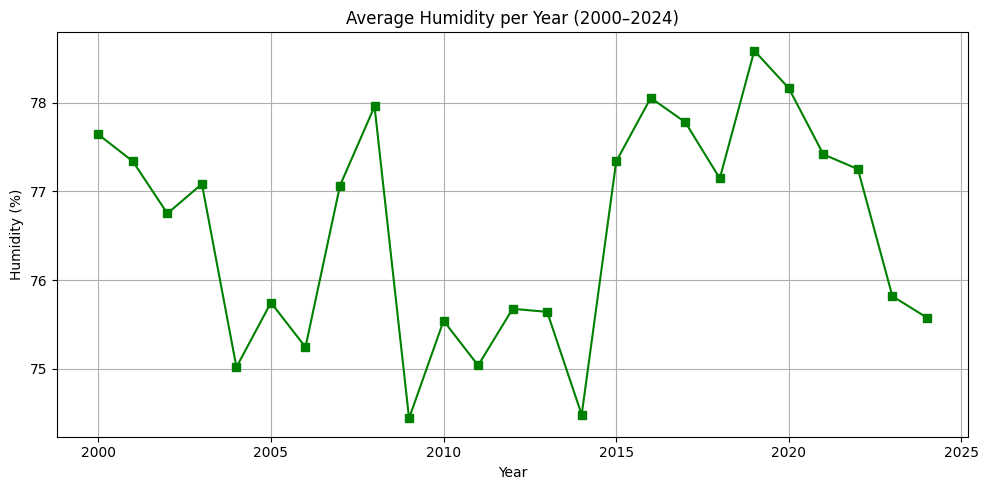

In [ ]:
#Plot 3 Key Graphs (Yearly Trends)

import matplotlib.pyplot as plt

# Group data by year for 2000–2024
yearly_data = df.groupby(df['year']).agg({
    'temperature_2m_mean': 'mean',
    'precipitation_sum': 'sum',
    'relative_humidity_2m_mean': 'mean'
}).reset_index()

# Plot 1: Average Temperature per Year
plt.figure(figsize=(10, 5))
plt.plot(yearly_data['year'], yearly_data['temperature_2m_mean'], marker='o', color='red')
plt.title("Average Temperature per Year (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Total Rainfall per Year
plt.figure(figsize=(10, 5))
plt.bar(yearly_data['year'], yearly_data['precipitation_sum'], color='skyblue')
plt.title("Total Rainfall per Year (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Average Humidity per Year
plt.figure(figsize=(10, 5))
plt.plot(yearly_data['year'], yearly_data['relative_humidity_2m_mean'], marker='s', color='green')
plt.title("Average Humidity per Year (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-770909720.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  pre_monsoon['month'] = pre_monsoon['date'].dt.to_period('M')
/tmp/ipython-input-770909720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_monsoon['month'] = pre_monsoon['date'].dt.to_period('M')


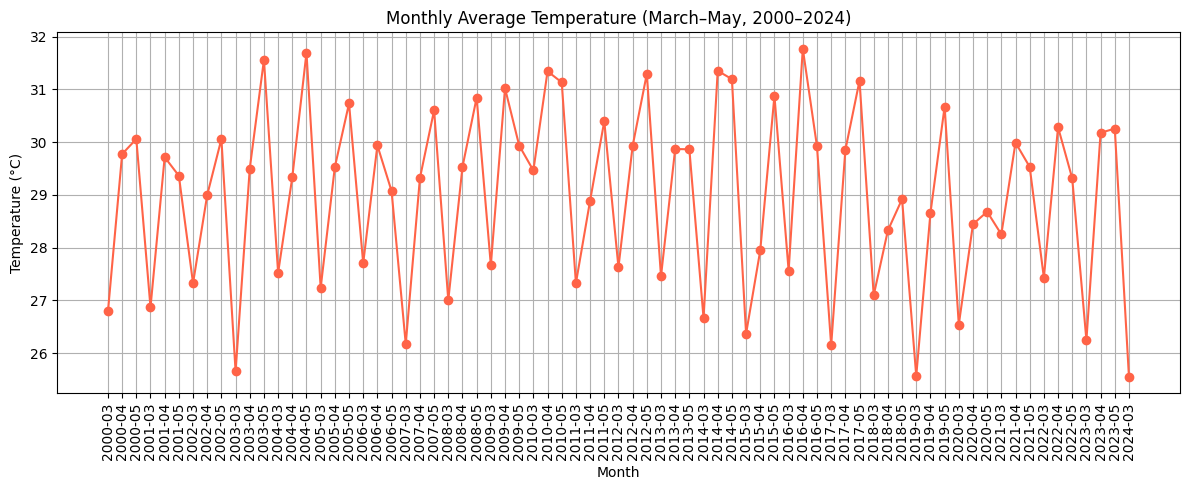

In [ ]:
#Monthly Average Temperature (March to May)
# Filter only March–May (Pre-monsoon) data
pre_monsoon = df[df['date'].dt.month.isin([3, 4, 5])]

# Extract year-month
pre_monsoon['month'] = pre_monsoon['date'].dt.to_period('M')

# Group and average temperature
monthly_temp = pre_monsoon.groupby('month')['temperature_2m_mean'].mean().reset_index()
monthly_temp['month'] = monthly_temp['month'].astype(str)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_temp['month'], monthly_temp['temperature_2m_mean'], marker='o', color='tomato')
plt.xticks(rotation=90)
plt.title("Monthly Average Temperature (March–May, 2000–2024)")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


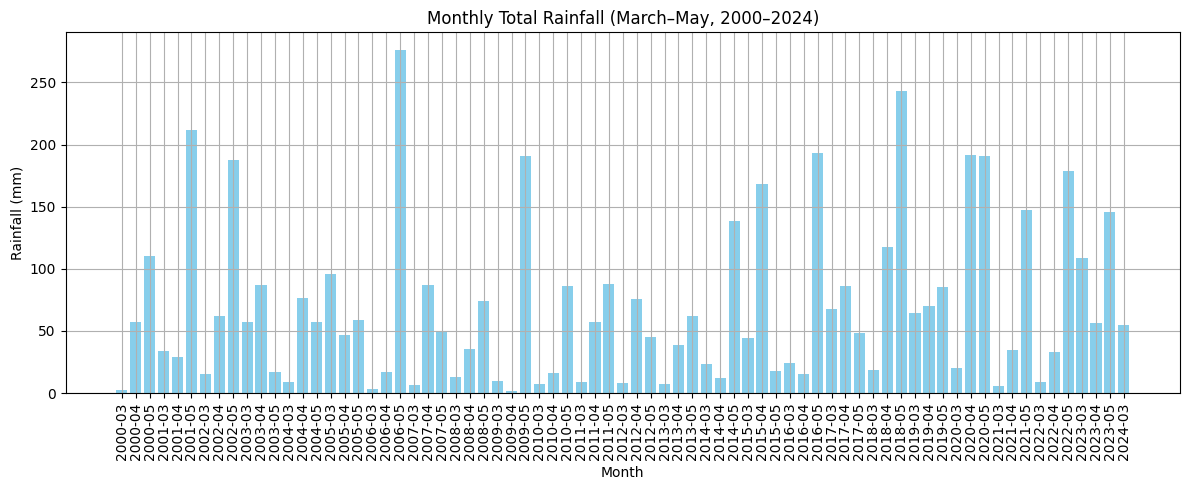

In [ ]:
#Monthly Total Rainfall (March to May)
# Group and sum precipitation [Monthly Total Rainfall (March to May)]
monthly_rain = pre_monsoon.groupby('month')['precipitation_sum'].sum().reset_index()
monthly_rain['month'] = monthly_rain['month'].astype(str)

# Plot
plt.figure(figsize=(12, 5))
plt.bar(monthly_rain['month'], monthly_rain['precipitation_sum'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Monthly Total Rainfall (March–May, 2000–2024)")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Group again by year
yearly = df.groupby(df['year']).agg({
    'temperature_2m_mean': 'mean',
    'precipitation_sum': 'sum',
    'relative_humidity_2m_mean': 'mean'
}).reset_index()

# Calculate % change year-over-year
yearly['ΔTemp (%)'] = yearly['temperature_2m_mean'].pct_change() * 100
yearly['ΔRain (%)'] = yearly['precipitation_sum'].pct_change() * 100
yearly['ΔHumidity (%)'] = yearly['relative_humidity_2m_mean'].pct_change() * 100

# Round for neatness
yearly = yearly.round(2)

# Display table
import pandas as pd
from google.colab import data_table
data_table.DataTable(yearly)


,year,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,ΔTemp (%),ΔRain (%),ΔHumidity (%)
0,2000,26.72,1337.0,77.64,NaN,NaN,NaN
1,2001,25.46,1716.5,77.34,-4.72,28.38,-0.39
2,2002,25.77,1683.7,76.75,1.23,-1.91,-0.76
3,2003,25.65,1482.3,77.08,-0.47,-11.96,0.43
4,2004,25.88,1389.6,75.02,0.90,-6.25,-2.68
5,2005,26.12,1489.1,75.75,0.93,7.16,0.97
6,2006,26.21,1430.4,75.24,0.36,-3.94,-0.66
7,2007,25.75,1864.7,77.07,-1.76,30.36,2.42
8,2008,25.68,1793.5,77.96,-0.27,-3.82,1.16
9,2009,26.54,1299.3,74.44,3.34,-27.56,-4.52


In [ ]:
df.to_csv("cleaned_weather_data.csv", index=False)


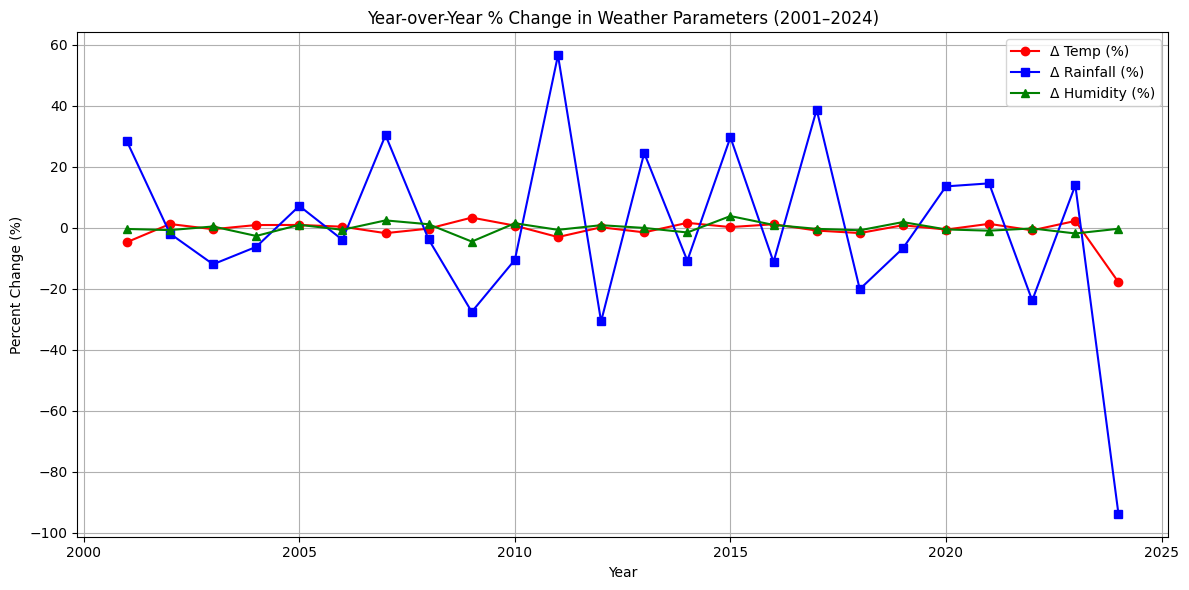

In [ ]:
#Year-over-Year Rate Change Line Graph
plt.figure(figsize=(12, 6))
plt.plot(yearly['year'], yearly['ΔTemp (%)'], marker='o', label='Δ Temp (%)', color='red')
plt.plot(yearly['year'], yearly['ΔRain (%)'], marker='s', label='Δ Rainfall (%)', color='blue')
plt.plot(yearly['year'], yearly['ΔHumidity (%)'], marker='^', label='Δ Humidity (%)', color='green')
plt.title('Year-over-Year % Change in Weather Parameters (2001–2024)')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



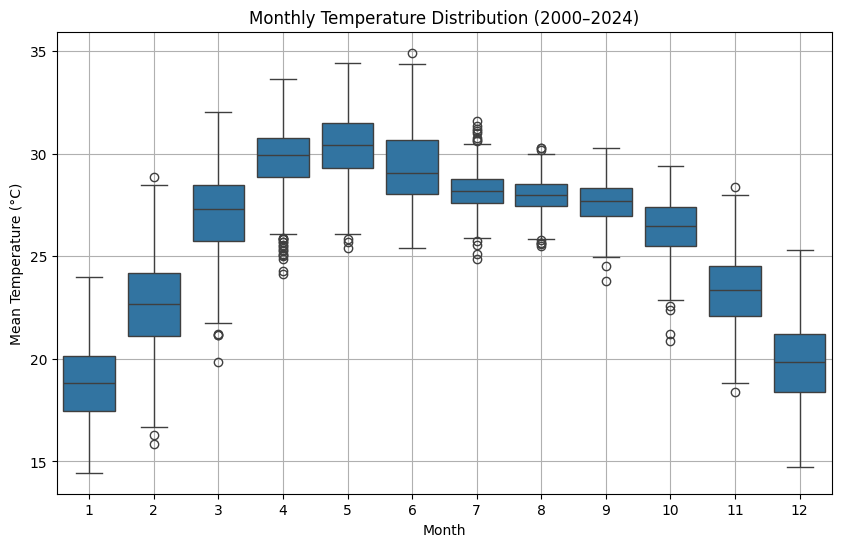

In [ ]:
#Box Plot: Monthly Temperature Spread (All Years)
df['month'] = df['date'].dt.month
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='temperature_2m_mean', data=df)
plt.title("Monthly Temperature Distribution (2000–2024)")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.grid(True)
plt.show()


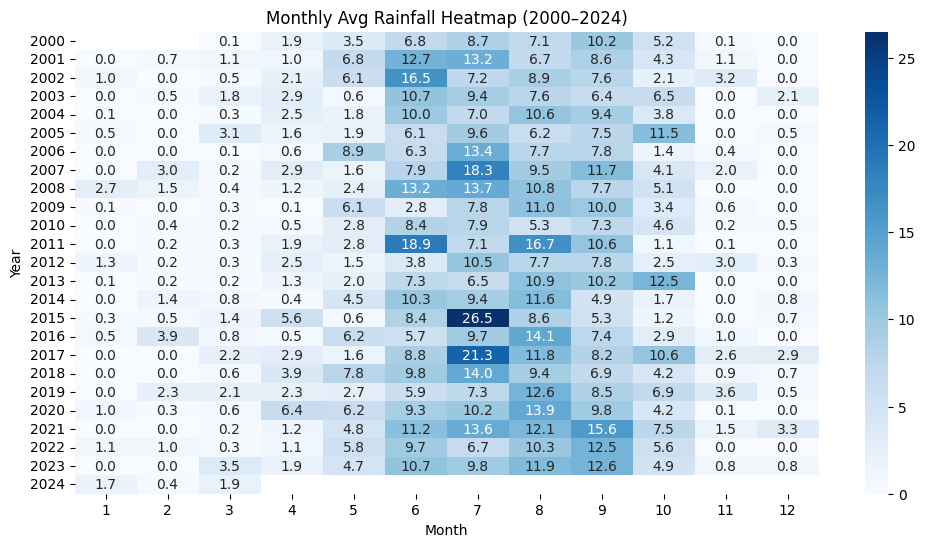

In [ ]:
#Heatmap of Monthly Avg Rainfall (2000–2024)
# Extract year and month
df['month'] = df['date'].dt.month
pivot = df.pivot_table(index='year', columns='month', values='precipitation_sum', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt=".1f")
plt.title("Monthly Avg Rainfall Heatmap (2000–2024)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [ ]:
# Run this cell first in Colab to ensure all libraries are available
!pip install xgboost imbalanced-learn --quiet



In [ ]:
#Load data, create labels (merge hail_events.csv if present), and inspect

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load main data
df = pd.read_csv("Hailstorm_Kolkata_Daily_weather_data.csv")

# Ensure date parsed
df['date'] = pd.to_datetime(df['date'])

# Make sure there's a 'year' and 'month' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# --- Create labels: Preferred method: merge with hail_events.csv ---
import os
if os.path.exists("hail_events.csv"):
    events = pd.read_csv("hail_events.csv")
    events['date'] = pd.to_datetime(events['date'])
    events['hail'] = 1
    # merge on date
    df = df.merge(events[['date','hail']], on='date', how='left')
    df['hail'] = df['hail'].fillna(0).astype(int)
    print("Merged hail_events.csv -> labelled hail days from file.")
else:
    # Fallback proxy labeling (ONLY if you don't have event labels)
    # This is a heuristic: adjust thresholds as you like or skip this
    print("hail_events.csv not found. Creating proxy labels using simple heuristics.")
    # Example heuristic: high precipitation day and temperature range likely present
    # Adjust thresholds after EDA
    precip_thresh = df['precipitation_sum'].quantile(0.95)  # top 5% rainfall
    wind_thresh = df['wind_gusts_10m_max'].quantile(0.90) if 'wind_gusts_10m_max' in df.columns else df['wind_speed_10m_max'].quantile(0.90)
    temp_max_thresh = df['temperature_2m_max'].quantile(0.90)
    # create proxy hail label
    df['hail'] = ((df['precipitation_sum'] >= precip_thresh) & (df.get('wind_gusts_10m_max', df['wind_speed_10m_max']) >= wind_thresh)).astype(int)

# Quick check class balance
print("Label counts (hail vs non-hail):")
print(df['hail'].value_counts(), "\n")


hail_events.csv not found. Creating proxy labels using simple heuristics.
Label counts (hail vs non-hail):
hail
0    8710
1      85
Name: count, dtype: int64 



In [ ]:
#Feature selection & basic feature engineering

# 2.1 Select candidate features by keywords
cols = df.columns.tolist()
keywords = ['temp','temperature','precip','rain','humidity','wind','gust','pressure','cape','vapor','cloud','wet_bulb']
selected = []
for k in keywords:
    for c in cols:
        if k in c.lower() and c not in ['hail']:  # avoid accidental picks
            selected.append(c)
# Remove duplicates and ensure certain essential cols exist
selected = sorted(list(set(selected)))
print("Selected feature columns (by keyword):", selected)

# 2.2 If selected is empty for some reason, provide a fallback manual list
if len(selected) == 0:
    fallback = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
                'precipitation_sum', 'relative_humidity_2m_mean',
                'wind_speed_10m_max', 'wind_gusts_10m_max', 'pressure_msl_mean']
    selected = [c for c in fallback if c in df.columns]
    print("Using fallback selection:", selected)

# 2.3 Create lag features and rolling means (1-day, 3-day, 7-day)
lags = [1,3,7]
for col in selected:
    for lag in lags:
        newc = f"{col}_lag{lag}"
        df[newc] = df[col].shift(lag)
    # rolling mean 3-day and 7-day
    df[f"{col}_rmean3"] = df[col].rolling(window=3, min_periods=1).mean()
    df[f"{col}_rmean7"] = df[col].rolling(window=7, min_periods=1).mean()

# 2.4 Date-based features
df['month_sin'] = np.sin(2*np.pi*df['month']/12)
df['month_cos'] = np.cos(2*np.pi*df['month']/12)
df['is_premonsoon'] = df['month'].isin([3,4,5]).astype(int)

# 2.5 Final feature list
feature_cols = [c for c in df.columns if (
                c in selected or
                any(c.endswith(s) for s in ['_lag1','_lag3','_lag7','_rmean3','_rmean7']) or
                c in ['month_sin','month_cos','is_premonsoon'])]
# Remove identifier columns
feature_cols = [c for c in feature_cols if c not in ['date','year','month','day','hail']]
print("Final number of features:", len(feature_cols))


Selected feature columns (by keyword): ['apparent_temperature_max', 'apparent_temperature_mean', 'apparent_temperature_min', 'cape_max', 'cape_mean', 'cape_min', 'cloud_cover_max', 'cloud_cover_mean', 'cloud_cover_min', 'precipitation_hours', 'precipitation_probability_mean', 'precipitation_probability_min', 'precipitation_sum', 'pressure_msl_max', 'pressure_msl_mean', 'pressure_msl_min', 'rain_sum', 'relative_humidity_2m_max', 'relative_humidity_2m_mean', 'relative_humidity_2m_min', 'temperature_2m_max', 'temperature_2m_mean', 'temperature_2m_min', 'wet_bulb_temperature_2m_max', 'wet_bulb_temperature_2m_mean', 'wet_bulb_temperature_2m_min', 'wind_direction_10m_dominant', 'wind_gusts_10m_max', 'wind_gusts_10m_mean', 'wind_gusts_10m_min', 'wind_speed_10m_max', 'wind_speed_10m_mean', 'wind_speed_10m_min', 'winddirection_10m_dominant']
Final number of features: 207


/tmp/ipython-input-2652061433.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_rmean7"] = df[col].rolling(window=7, min_periods=1).mean()
/tmp/ipython-input-2652061433.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[newc] = df[col].shift(lag)
/tmp/ipython-input-2652061433.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

In [ ]:
# Prepare dataset for ML (drop NaNs caused by shifting) & inspect label balance

# Drop rows where feature values are NaN (from lagging)
ml_df = df.dropna(subset=feature_cols + ['hail']).copy()

# Quick class ratio
print("ML dataset size:", ml_df.shape)
print("Hail distribution:")
print(ml_df['hail'].value_counts(normalize=True) * 100)

# Feature matrix and target
X = ml_df[feature_cols]
y = ml_df['hail']


ML dataset size: (0, 216)
Hail distribution:
Series([], Name: proportion, dtype: float64)


In [ ]:
# Fill NaN values from lag/rolling features with original column or 0
for col in feature_cols:
    if df[col].isnull().any():
        base_col = col.split('_lag')[0].split('_rmean')[0]  # try to map back to original
        if base_col in df.columns:
            df[col] = df[col].fillna(df[base_col])
        else:
            df[col] = df[col].fillna(0)

# Now drop only rows where 'hail' is NaN (shouldn't happen after label creation)
ml_df = df.dropna(subset=['hail']).copy()

# Define features and target
X = ml_df[feature_cols]
y = ml_df['hail']

print("Samples in ML dataframe:", X.shape[0])
print("Hail distribution:", y.value_counts())


Samples in ML dataframe: 8795
Hail distribution: hail
0    8710
1      85
Name: count, dtype: int64


In [ ]:
X = ml_df[feature_cols]
y = ml_df['hail']


In [ ]:
# 1) Drop columns with all NaNs
valid_cols = X.columns[X.notna().any()]
X = X[valid_cols]

# 2) Impute remaining NaNs with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 3) Keep feature names
X = pd.DataFrame(X_imputed, columns=valid_cols)

print("Final feature count:", X.shape[1])


Final feature count: 177


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train hail distribution:", np.bincount(y_train))
print("Test hail distribution:", np.bincount(y_test))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_res))


Train hail distribution: [6968   68]
Test hail distribution: [1742   17]
After SMOTE: [6968 6968]


Train size: (7036, 177) Test size: (1759, 177)
Train class counts: [6968   68] Test class counts: [1742   17]
After SMOTE train class counts: [6968 6968]

Training & tuning: DecisionTree
DecisionTree best params: {'clf__min_samples_split': 5, 'clf__max_depth': 10}

Training & tuning: RandomForest
RandomForest best params: {'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__max_depth': 15}

Training & tuning: SVM
SVM best params: {'clf__kernel': 'rbf', 'clf__C': 10}

Training & tuning: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:07:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost best params: {'clf__n_estimators': 100, 'clf__max_depth': 10, 'clf__learning_rate': 0.1}

=== DecisionTree ===
              precision    recall  f1-score   support

           0     0.9994    1.0000    0.9997      1742
           1     1.0000    0.9412    0.9697        17

    accuracy                         0.9994      1759
   macro avg     0.9997    0.9706    0.9847      1759
weighted avg     0.9994    0.9994    0.9994      1759



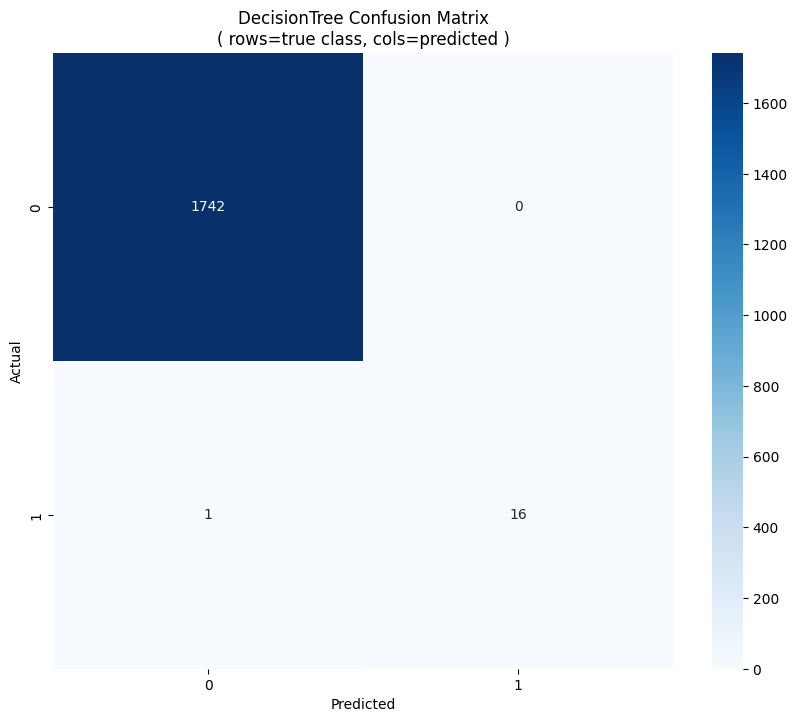


=== RandomForest ===
              precision    recall  f1-score   support

           0     0.9989    1.0000    0.9994      1742
           1     1.0000    0.8824    0.9375        17

    accuracy                         0.9989      1759
   macro avg     0.9994    0.9412    0.9685      1759
weighted avg     0.9989    0.9989    0.9988      1759



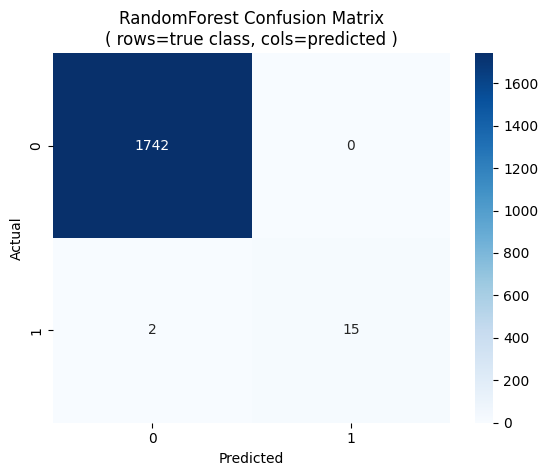


=== SVM ===
              precision    recall  f1-score   support

           0     0.9954    0.9977    0.9966      1742
           1     0.6923    0.5294    0.6000        17

    accuracy                         0.9932      1759
   macro avg     0.8439    0.7636    0.7983      1759
weighted avg     0.9925    0.9932    0.9927      1759



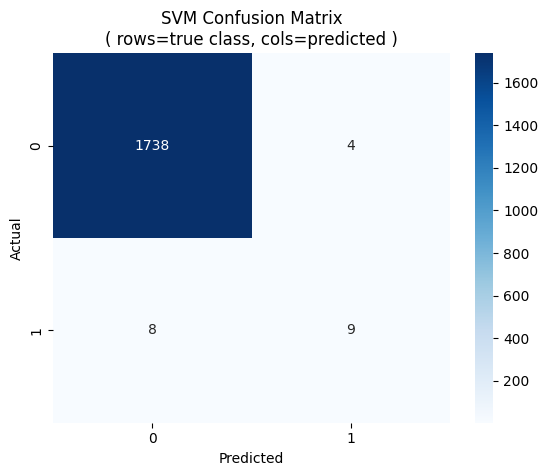


=== XGBoost ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1742
           1     1.0000    1.0000    1.0000        17

    accuracy                         1.0000      1759
   macro avg     1.0000    1.0000    1.0000      1759
weighted avg     1.0000    1.0000    1.0000      1759



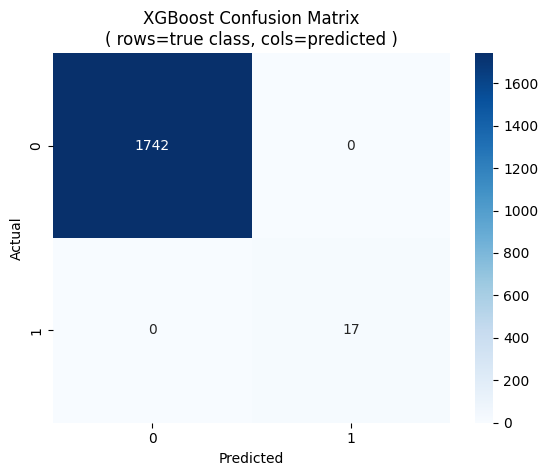

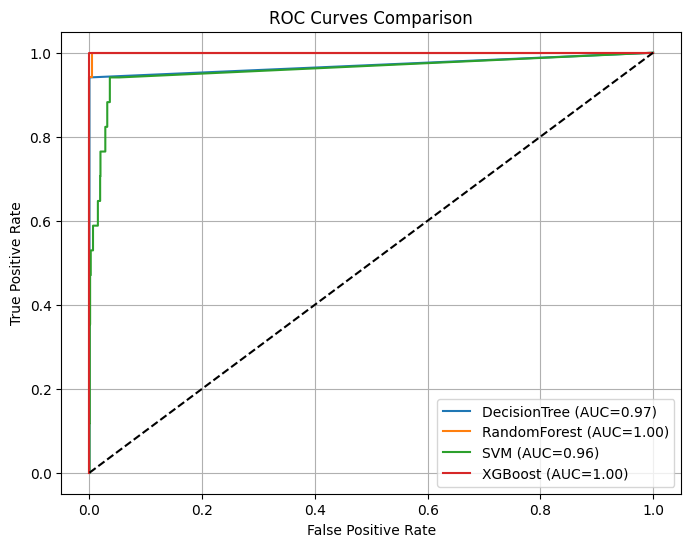

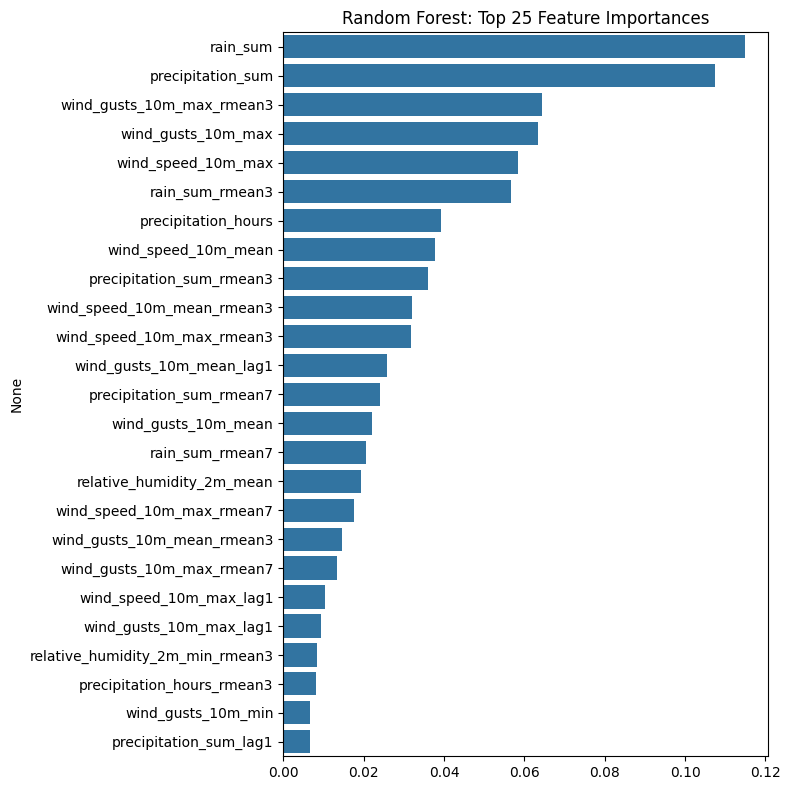

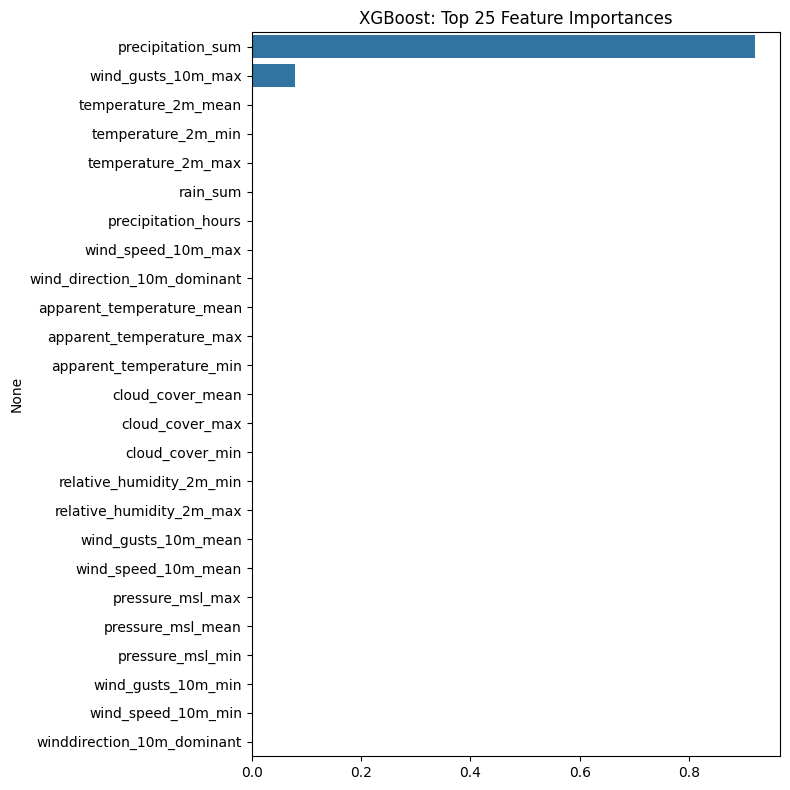


Model comparison table:


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,XGBoost,1.0000,1.0000,1.0000,1.0000,1.0000
1,RandomForest,0.9989,1.0000,0.8824,0.9375,0.9997
2,DecisionTree,0.9994,1.0000,0.9412,0.9697,0.9706
3,SVM,0.9932,0.6923,0.5294,0.6000,0.9595


Saved: best_random_forest.pkl, best_xgboost.pkl, ml_model_comparison.csv


from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['F1'].plot(kind='hist', bins=20, title='F1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Recall', y='F1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='F1', y='ROC_AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['F1'].plot(kind='line', figsize=(8, 4), title='F1')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='F1', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# === ML Training & Evaluation Block ===
# Requirements: scikit-learn, xgboost, imbalanced-learn, joblib, seaborn, matplotlib
# Run: pip install xgboost imbalanced-learn joblib seaborn --quiet   (if not installed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, accuracy_score,
                             precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# ---------- 1) Train/Test split (stratified) ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)
print("Train class counts:", np.bincount(y_train), "Test class counts:", np.bincount(y_test))

# ---------- 2) SMOTE on training set ----------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE train class counts:", np.bincount(y_train_res))

# ---------- 3) Define model pipelines and param grids ----------
pipe_dt = Pipeline([('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))])
pipe_svc = Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True, class_weight='balanced', random_state=42))])
pipe_xgb = Pipeline([('scaler', StandardScaler()), ('clf', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

param_dt = {'clf__max_depth': [None, 6, 10], 'clf__min_samples_split': [2, 5, 10]}
param_rf = {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 8, 15], 'clf__min_samples_split': [2, 5]}
param_svc = {'clf__C': [0.1, 1, 10], 'clf__kernel': ['rbf', 'linear']}
param_xgb = {'clf__n_estimators': [100, 200], 'clf__max_depth': [3, 6, 10], 'clf__learning_rate': [0.01, 0.1]}

models = [
    ('DecisionTree', pipe_dt, param_dt),
    ('RandomForest', pipe_rf, param_rf),
    ('SVM', pipe_svc, param_svc),
    ('XGBoost', pipe_xgb, param_xgb)
]

# ---------- 4) RandomizedSearchCV for each model (lightweight) ----------
best_estimators = {}
for name, pipe, grid in models:
    print(f"\nTraining & tuning: {name}")
    rs = RandomizedSearchCV(pipe, grid, n_iter=6, cv=3, scoring='f1', n_jobs=-1, random_state=42, verbose=0)
    rs.fit(X_train_res, y_train_res)
    print(f"{name} best params: {rs.best_params_}")
    best_estimators[name] = rs.best_estimator_

# ---------- 5) Evaluate on test set and collect metrics ----------
results = []
plt.rcParams.update({'figure.max_open_warning': 0})

plt.figure(figsize=(10, 8))
for name, est in best_estimators.items():
    # predictions & probabilities
    y_pred = est.predict(X_test)
    try:
        y_proba = est.predict_proba(X_test)[:, 1]
    except:
        # SVM decision_function fallback
        y_proba = est.decision_function(X_test)
    # metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1': round(f1, 4),
        'ROC_AUC': round(roc, 4)
    })
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix\n( rows=true class, cols=predicted )")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ---------- 6) ROC curve comparison ----------
plt.figure(figsize=(8, 6))
for name, est in best_estimators.items():
    try:
        y_proba = est.predict_proba(X_test)[:, 1]
    except:
        y_proba = est.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()

# ---------- 7) Feature importance (RF & XGB) ----------
feature_names = X.columns.tolist()
if 'RandomForest' in best_estimators:
    rf = best_estimators['RandomForest'].named_steps['clf']
    fi = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False).head(25)
    plt.figure(figsize=(8, 8))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title("Random Forest: Top 25 Feature Importances")
    plt.tight_layout()
    plt.show()

if 'XGBoost' in best_estimators:
    xclf = best_estimators['XGBoost'].named_steps['clf']
    fi2 = pd.Series(xclf.feature_importances_, index=feature_names).sort_values(ascending=False).head(25)
    plt.figure(figsize=(8, 8))
    sns.barplot(x=fi2.values, y=fi2.index)
    plt.title("XGBoost: Top 25 Feature Importances")
    plt.tight_layout()
    plt.show()

# ---------- 8) Results table & save ----------
results_df = pd.DataFrame(results).sort_values(by='ROC_AUC', ascending=False).reset_index(drop=True)
print("\nModel comparison table:")
display(results_df)

# Save top models & results
joblib.dump(best_estimators['RandomForest'], "best_random_forest.pkl")
joblib.dump(best_estimators['XGBoost'], "best_xgboost.pkl")
results_df.to_csv("ml_model_comparison.csv", index=False)
print("Saved: best_random_forest.pkl, best_xgboost.pkl, ml_model_comparison.csv")


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

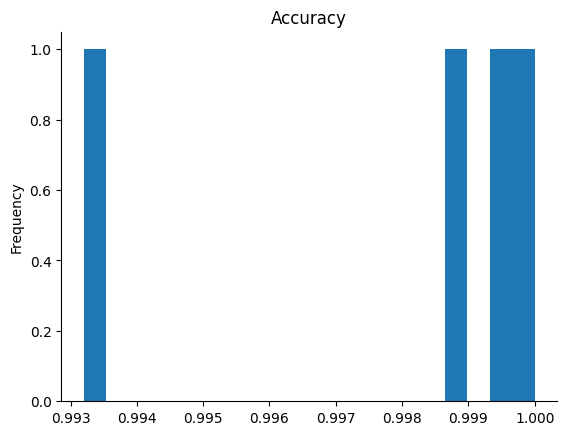

In [ ]:
# @title Accuracy

from matplotlib import pyplot as plt
results_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)